In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
avengers = pd.read_csv("avengers.csv")
avengers.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


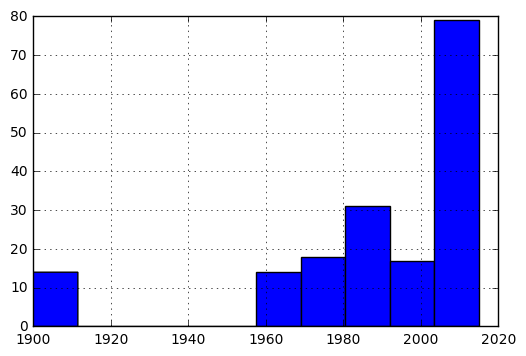

In [7]:
avengers["Year"].hist()
plt.show()

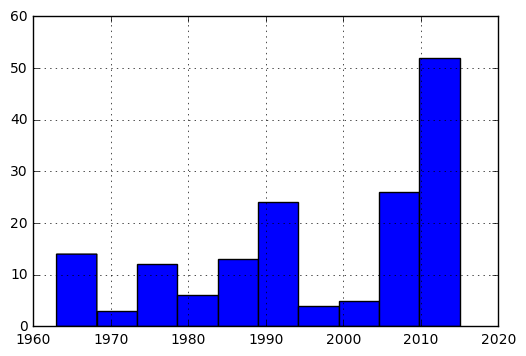

In [12]:
# Remove the Avengers where year < 1960
true_avengers = avengers[avengers["Year"] >= 1960]

In [81]:
# count_deaths counts the number of 'YES' in the columns
def count_deaths(row):
    columns=["Death1","Death2","Death3","Death4","Death5"]
    count=0
    for c in columns:
        death = row[c]
        if (pd.isnull(death)) or (death == "NO"):
            continue
        elif death == "YES":
            count+=1
    return count

true_avengers['Deaths'] = true_avengers.apply(count_deaths, axis=1)

/Users/oliver/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [91]:
# Calculate the number of rows where Years since joining is accurate, taking 2015 as reference
joined_accuracy_count = int()
def check_years(row):
    count=0
    if row["Years since joining"] == 2015-row["Year"]:
        count+=1
    return count
joined_accuracy_count = true_avengers.apply(check_years,axis=1).sum()

# OR:
#joined_accuracy_count  = int()
#correct_joined_years = true_avengers[true_avengers['Years since joining'] == (2015 - true_avengers['Year'])]
#joined_accuracy_count = len(correct_joined_years)